# Movie Recommendation System

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

## Reading the datasets

#### Accessing the ratings dataset

In [10]:
df = pd.read_csv('ratings.csv')

In [11]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### Accessing the movies dataset

In [12]:
movies = pd.read_csv('movies.csv')

In [13]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Merging the two datasets using 'movieId' as the foreign key

In [15]:
df = pd.merge(df,movies,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## Exploratory Data Analysis

#### Exploring the data in search of the best rated movies

### Visualization Imports

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Creating rating dataframe with average rating and number of ratings

In [17]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [18]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [19]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [59]:
ratings['no. of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,no. of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


### Histograms

#### Histogram based on no. of ratings

Text(0.5, 1.0, 'Count of Ratings Distribution Histogram')

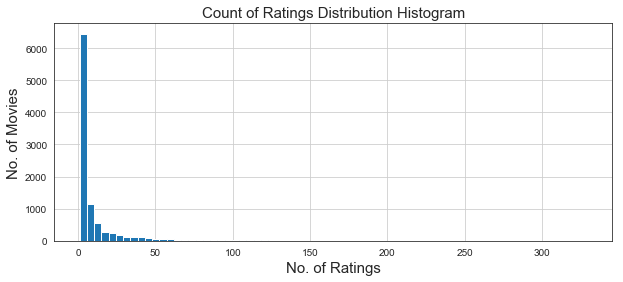

In [60]:
plt.figure(figsize=(10,4))
ratings['no. of ratings'].hist(bins=70)
plt.xlabel('No. of Ratings',fontsize=15)
plt.ylabel('No. of Movies',fontsize=15)
plt.title('Count of Ratings Distribution Histogram', fontsize=15)

#### Histogram based on movie ratings

Text(0.5, 1.0, 'Ratings Distribution Histogram')

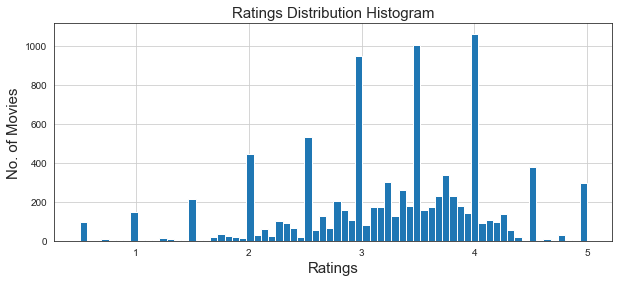

In [61]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)
plt.xlabel('Ratings',fontsize=15)
plt.ylabel('No. of Movies',fontsize=15)
plt.title('Ratings Distribution Histogram', fontsize=15)

#### Joining both historgrams

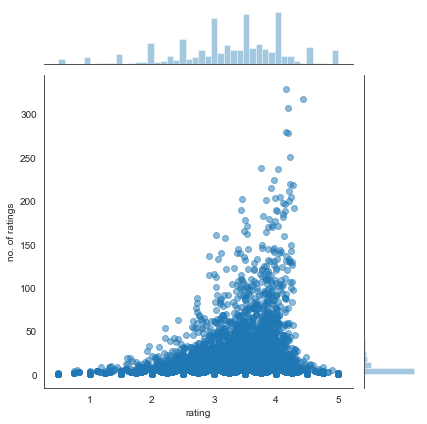

In [46]:
jp = sns.jointplot(x='rating',y='no. of ratings',data=ratings,alpha=0.5)


## Movie Recommendations

#### Creating matrix with user ID and movies. If the user has rated a specific movie, the cell corresponding to the movie and the user will contain the movie rating given by the user.

#### Note: Not ever movie is seen by a user, hence, there will be many cells as 'NaN' signifying 'Not rated'.

In [47]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Movie ratings in descending order

In [62]:
ratings.sort_values('no. of ratings',ascending=False).head(10)

,rating,no. of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


#### Picking 2 movies from the produced list
#### Star Wars: Episode IV - A New Hope (1977) is a sci-fi movie
#### Pulp Fiction (1994) is a comedy/crime movie

In [63]:
ratings.head()

,rating,no. of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [74]:

starwars_ratings = moviemat['Star Wars: Episode IV - A New Hope (1977)']
pulpfiction_ratings = moviemat['Pulp Fiction (1994)']
pulpfiction_ratings.head()

userId
1    3.0
2    NaN
3    NaN
4    1.0
5    5.0
Name: Pulp Fiction (1994), dtype: float64

#### Finding the correlation between two movies

In [75]:
SimilarToStarWars = moviemat.corrwith(starwars_ratings)
SimilarToPulpFiction = moviemat.corrwith(pulpfiction_ratings)

In [77]:
corr_starwars = pd.DataFrame(SimilarToStarWars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
"'burbs, The (1989)",0.155161
(500) Days of Summer (2009),0.024299
*batteries not included (1987),-0.269069
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),0.360885


#### Sorting the resulting dataframe by correlation to obtain most similar movies

In [78]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Lakeview Terrace (2008),1.0
Cry_Wolf (a.k.a. Cry Wolf) (2005),1.0
Creep (2014),1.0
Non-Stop (2014),1.0
Not Without My Daughter (1991),1.0
Confessions of a Teenage Drama Queen (2004),1.0
Concussion (2015),1.0
Opera (1987),1.0
Our Hospitality (1923),1.0


#### Filtering out movies with less than 100 reviews, to improve the system recommendations

In [88]:
corr_starwars = corr_starwars.join(ratings['no. of ratings'])
corr_starwars.head()

,Correlation,no. of ratings
title,,
"'burbs, The (1989)",0.155161,17
(500) Days of Summer (2009),0.024299,42
*batteries not included (1987),-0.269069,7
10 Cent Pistol (2015),1.000000,2
10 Cloverfield Lane (2016),0.360885,14


In [94]:
starwars_rec = corr_starwars[corr_starwars['no. of ratings']>100]
starwars_rec.sort_values('Correlation',ascending=False).head()

,Correlation,no. of ratings
title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,251
Star Wars: Episode V - The Empire Strikes Back (1980),0.777970,211
Star Wars: Episode VI - Return of the Jedi (1983),0.734230,196
"Fugitive, The (1993)",0.482078,190
Indiana Jones and the Last Crusade (1989),0.410916,140


#### Performing the same for Pulp Fiction

In [95]:
corr_pulpfiction = pd.DataFrame(SimilarToPulpFiction, columns=['Correlation'])
corr_pulpfiction.dropna(inplace=True)
corr_pulpfiction = corr_pulpfiction.join(ratings['no. of ratings'])
pulpfiction_rec = corr_pulpfiction[corr_pulpfiction['no. of ratings']>100]
pulpfiction_rec.sort_values('Correlation',ascending=False).head()

,Correlation,no. of ratings
title,,
Pulp Fiction (1994),1.000000,307
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Trainspotting (1996),0.437714,102
Kill Bill: Vol. 2 (2004),0.421685,110
